In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/content/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")

In [3]:
df.describe()

,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
count,53392.000000,53392.000000,0.0,48346.000000,48346.000000,48346.000000,48346.000000,48346.00000,53392.000000
mean,2013.281465,2013.281465,NaN,31.156681,31.156681,26.892227,35.989997,3889.19286,30.282215
std,1.693300,1.693300,NaN,10.247033,10.247033,10.038584,11.205813,19829.42129,16.821318
min,2011.000000,2011.000000,NaN,0.900000,0.900000,0.300000,3.000000,50.00000,1.000000
25%,2012.000000,2012.000000,NaN,24.100000,24.100000,20.000000,28.200000,566.00000,17.000000
50%,2013.000000,2013.000000,NaN,30.700000,30.700000,26.450000,35.600000,1209.00000,30.000000
75%,2015.000000,2015.000000,NaN,37.000000,37.000000,32.900000,42.200000,2519.00000,44.000000
max,2016.000000,2016.000000,NaN,77.600000,77.600000,69.500000,87.700000,476876.00000,78.000000


In [4]:
wrangled = df[df['StratificationID1'] == 'OVERALL'][['LocationDesc','Data_Value', 'Question', "YearStart" ]]
question = wrangled[wrangled['Question'] == 'Percent of adults who engage in no leisure-time physical activity'][['LocationDesc','Data_Value', 'Question', "YearStart" ]]
x_all = question[question['YearStart'] == 2014][['LocationDesc','Data_Value' ]]
x = question[question['YearStart'] == 2014][['Data_Value' ]].values

In [5]:
x = x.reshape(-1, 1)
x

array([[27.6],
       [19.2],
       [21.2],
       [30.7],
       [21.7],
       [16.4],
       [20.6],
       [24.9],
       [20.8],
       [23.7],
       [23.6],
       [27.7],
       [19.6],
       [18.7],
       [23.9],
       [26.1],
       [22.6],
       [23.8],
       [28.2],
       [29.5],
       [19.7],
       [21.4],
       [20.1],
       [25.5],
       [20.2],
       [31.6],
       [25. ],
       [19.6],
       [23.7],
       [21.3],
       [22.5],
       [19.3],
       [23.3],
       [23.3],
       [25.9],
       [23.2],
       [21.3],
       [25. ],
       [28.3],
       [16.5],
       [23.3],
       [40.6],
       [22.5],
       [25.3],
       [21.2],
       [26.8],
       [27.6],
       [16.8],
       [19. ],
       [23.5],
       [18.1],
       [28.7],
       [21.2],
       [22.1]])

In [6]:
wrangled = df[df['StratificationID1'] == 'OVERALL'][['LocationDesc','Data_Value', 'Question', "YearStart" ]]
year = wrangled[wrangled['Question'] == 'Percent of adults aged 18 years and older who have obesity'][['LocationDesc','Data_Value', 'Question', "YearStart" ]]
y_all = year[year['YearStart'] == 2014][['LocationDesc','Data_Value' ]]
y = year[year['YearStart'] == 2014][['Data_Value' ]].values

In [7]:
y = y.reshape(-1, 1)
y

array([[33.5],
       [29.7],
       [28.9],
       [35.9],
       [24.7],
       [21.3],
       [26.3],
       [30.7],
       [21.7],
       [26.2],
       [30.5],
       [28. ],
       [22.1],
       [28.9],
       [29.3],
       [32.7],
       [30.9],
       [31.3],
       [31.6],
       [34.9],
       [28.2],
       [29.6],
       [23.3],
       [30.7],
       [27.6],
       [35.5],
       [30.2],
       [26.4],
       [28.9],
       [30.2],
       [27.7],
       [27.4],
       [26.9],
       [28.4],
       [27. ],
       [29.7],
       [32.2],
       [32.6],
       [33. ],
       [27.9],
       [30.2],
       [28.3],
       [27. ],
       [32.1],
       [29.8],
       [31.2],
       [31.9],
       [25.7],
       [24.8],
       [28.5],
       [27.3],
       [35.7],
       [31.2],
       [29.5]])

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.8, test_size=.2, random_state=100)

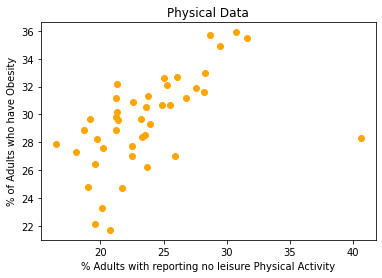

In [9]:
plt.scatter(x_train, y_train, color='orange')
plt.xlabel('% Adults with reporting no leisure Physical Activity')
plt.ylabel('% of Adults who have Obesity')
plt.title('Physical Data')
plt.show()

In [10]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)

In [11]:
print(f'Train Accuracy {round(lm.score(x_train, y_train)* 100,2)}%')
print(f'Test Accuracy {round(lm.score(x_test, y_test)* 100,2)}%')

Train Accuracy 29.76%
Test Accuracy 44.09%


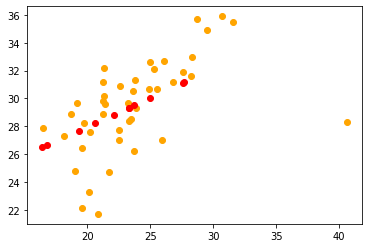

In [12]:
plt.scatter(x_train, y_train, color='orange')
plt.scatter(x_test, y_predict, color='red')
plt.show()

In [13]:
print('Intercept', lm.intercept_)
print('Coefficient', lm.coef_)

Intercept [19.71194003]
Coefficient [[0.41271641]]
